
# Data preparation

## Loading data

In [ ]:
import sys

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from pprint import pprint

In [ ]:
#dataset = fetch_california_housing(data_home='F:\RomaDataScience\DataSets', download_if_missing=True, return_X_y=False)
dataset = fetch_california_housing(download_if_missing=True, return_X_y=False)

In [ ]:
pprint(dataset.DESCR)

('.. _california_housing_dataset:\n'
 '\n'
 'California Housing dataset\n'
 '--------------------------\n'
 '\n'
 '**Data Set Characteristics:**\n'
 '\n'
 '    :Number of Instances: 20640\n'
 '\n'
 '    :Number of Attributes: 8 numeric, predictive attributes and the target\n'
 '\n'
 '    :Attribute Information:\n'
 '        - MedInc        median income in block\n'
 '        - HouseAge      median house age in block\n'
 '        - AveRooms      average number of rooms\n'
 '        - AveBedrms     average number of bedrooms\n'
 '        - Population    block population\n'
 '        - AveOccup      average house occupancy\n'
 '        - Latitude      house block latitude\n'
 '        - Longitude     house block longitude\n'
 '\n'
 '    :Missing Attribute Values: None\n'
 '\n'
 'This dataset was obtained from the StatLib repository.\n'
 'http://lib.stat.cmu.edu/datasets/\n'
 '\n'
 'The target variable is the median house value for California districts.\n'
 '\n'
 'This dataset was derived 

In [ ]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

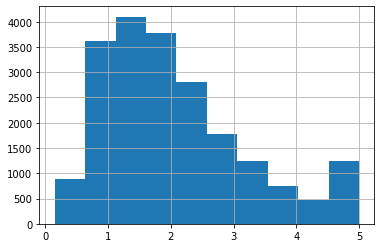

In [ ]:
df['target'].hist()

# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaled_features = MinMaxScaler().fit_transform(df.iloc[:, :8].values)

scaled_df = df.copy()
scaled_df.iloc[:, :8] = scaled_features
scaled_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,3.413
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,3.422
...,...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701,0.781
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749,0.771
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753,0.923
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793,0.847


### Distance to city center determination

intercept is  0.829349172717788
slope is  -1.0517768049768814
Predicted value in the 0.1 point is 0.7241714922200998


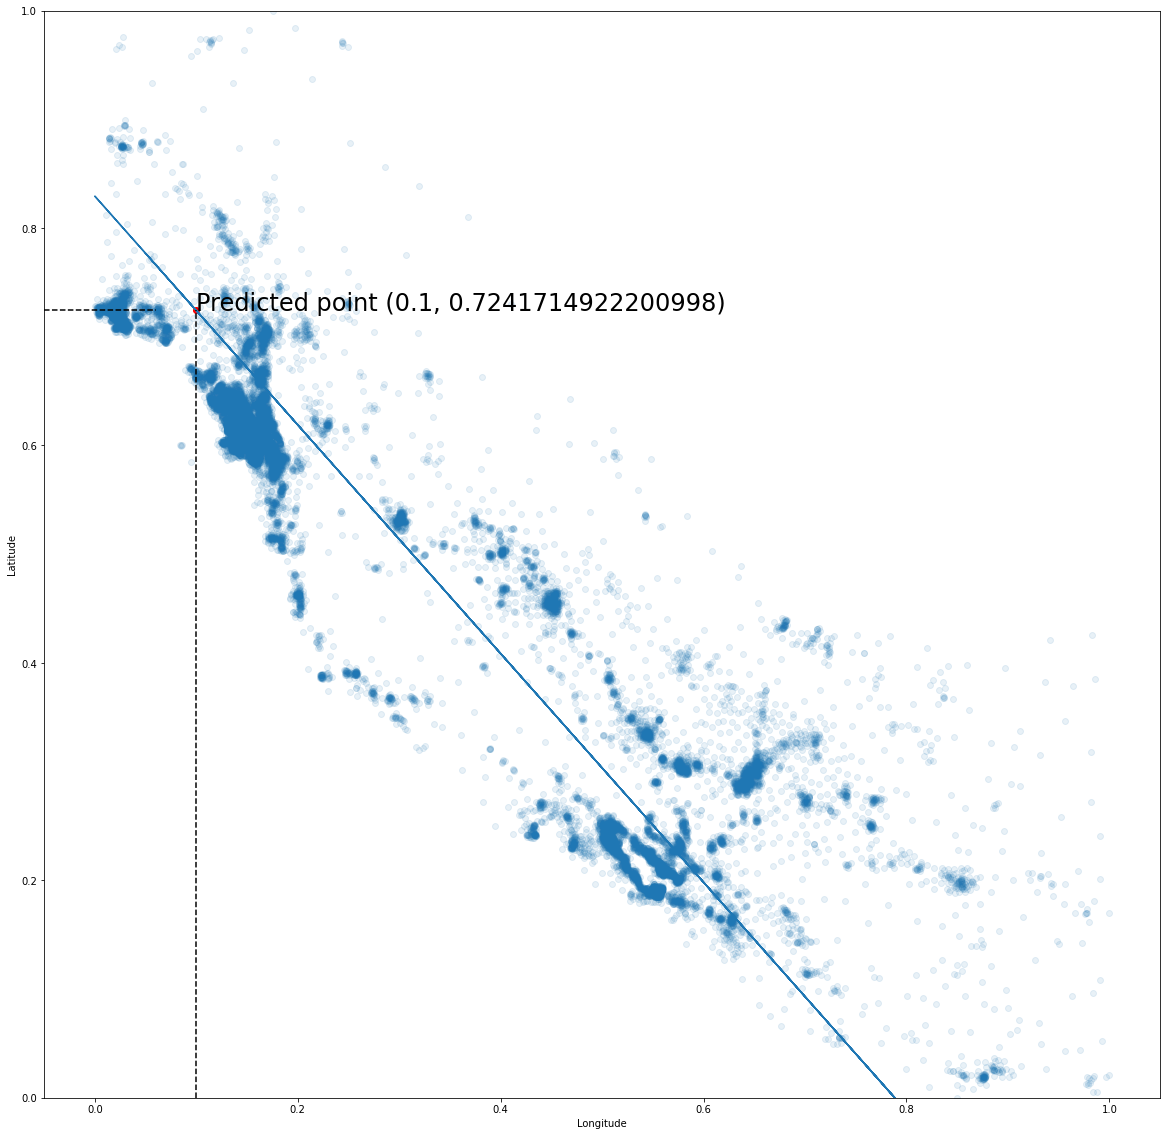

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import numpy as np
from numpy import mean

fig = plt.figure(figsize=(20, 20))
plt.scatter(scaled_df.Latitude, scaled_df.Longitude,  alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

longitude_list = scaled_df['Longitude'].to_list()
latitude_list = scaled_df['Latitude'].to_list()

b1 = (
    sum([a*b for a,b in zip(longitude_list, latitude_list)]) - (sum(longitude_list)*sum(latitude_list))/len(longitude_list)
) / (
    sum([i**2 for i in longitude_list]) - (sum(longitude_list))**2 / len(longitude_list)
)

b0 = mean(latitude_list) - b1 * mean(longitude_list)
print('intercept is ', b0)
print('slope is ', b1)
reg_line = b0 + b1 * np.array(longitude_list)

def reg_line_func(point):
  return b0 + b1 * point

plt.plot(longitude_list, reg_line)
point = 0.1
print('Predicted value in the {} point is {}'.format(point, reg_line_func(point)))


plt.scatter(point, reg_line_func(point), c='red')
plt.text(point, reg_line_func(point), 'Predicted point ({}, {})'.format(point, reg_line_func(point)), fontsize=24)
plt.axvline(x=point, ymin=0, ymax=reg_line_func(point), ls='--', color='k')
plt.axhline(y=reg_line_func(point), xmin=0, xmax=point, ls='--', color='k')

plt.ylim(0, 1)
plt.show()

In [ ]:
# Finding city center

from django.contrib.gis.geos import Point, MultiPoint

latitude_list = scaled_df['Latitude'].to_list()
longitude_list = scaled_df['Longitude'].to_list()

points = []

for x, y in zip(latitude_list, longitude_list):
  points.append(Point((x, y)))

multipoint = MultiPoint(*points)
center_city_point = multipoint.centroid

print(center_city_point.x, center_city_point.y)

0.3285718846024032 0.4761250540473677


In [ ]:
#Distance between two points is AB = √(xb - xa)2 + (yb - ya)2
from math import pow, sqrt

distance = []
for x, y in zip(latitude_list, longitude_list):
  distance.append(sqrt(pow(center_city_point.x - x, 2) + pow(center_city_point.y - y, 2)))

scaled_df['center-to-point_distance'] = distance

In [ ]:
scaled_df = scaled_df.reindex(columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'center-to-point_distance', 'target'])
scaled_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,center-to-point_distance,target
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.356773,4.526
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.354611,3.585
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.355390,3.521
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.356136,3.413
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.356136,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701,0.436076,0.781
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749,0.441356,0.771
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753,0.435814,0.923
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793,0.439667,0.847


### Most correlated values

In [ ]:
corr_main_df = scaled_df.corr()
corr_main_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,center-to-point_distance,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,-0.043244,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.049812,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.079628,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,0.065735,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.065430,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.006013,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,0.462668,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.384204,-0.045967
center-to-point_distance,-0.043244,-0.049812,0.079628,0.065735,-0.065430,-0.006013,0.462668,-0.384204,1.000000,-0.075564
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,-0.075564,1.000000


In [ ]:
target_corr_main_df = corr_main_df.loc['target','MedInc':'center-to-point_distance'].to_frame().T
target_corr_main_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,center-to-point_distance
target,0.688075,0.105623,0.151948,-0.046701,-0.02465,-0.023737,-0.14416,-0.045967,-0.075564


In [ ]:
cl = 0.1
big_corr_df = target_corr_main_df[(abs(target_corr_main_df[:]) > cl)].dropna(axis=1)
big_corr_df

,MedInc,HouseAge,AveRooms,Latitude
target,0.688075,0.105623,0.151948,-0.14416


In [ ]:
correlated_df = scaled_df[big_corr_df.columns.to_list()]
correlated_df

,MedInc,HouseAge,AveRooms,Latitude
0,0.539668,0.784314,0.043512,0.567481
1,0.538027,0.392157,0.038224,0.565356
2,0.466028,1.000000,0.052756,0.564293
3,0.354699,1.000000,0.035241,0.564293
4,0.230776,1.000000,0.038534,0.564293
...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.737513
20636,0.141853,0.333333,0.037344,0.738576
20637,0.082764,0.313725,0.030904,0.732200
20638,0.094295,0.333333,0.031783,0.732200


### Visualization

In [ ]:
# Plot function to imagine the city center

def plot_function(xs, ys, xlabel, ylabel):
  fig = plt.figure(figsize=(20, 10))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  
  # If we want the same offset for each text instance,
  # we only need to make one transform.  To get the
  # transform argument to offset_copy, we need to make the axes
  # first; the subplot command above is one way to do this.
  """
  trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                        x=0.05, y=0.10, units='inches')
  """
  for x, y in zip(xs, ys):
      plt.plot(x, y, 'ro')
      #plt.text(x, y, '%d, %d' % (int(x), int(y)), transform=trans_offset)

  """
  # offset_copy works for polar plots also.
  ax = plt.subplot(2, 1, 2, projection='polar')

  trans_offset = mtransforms.offset_copy(ax.transData, fig=fig,
                                        y=6, units='dots')

  for x, y in zip(xs, ys):
      plt.polar(x, y, 'ro')
      #plt.text(x, y, '%d, %d' % (int(x), int(y)),
      #        transform=trans_offset,
        #       horizontalalignment='center',
        #      verticalalignment='bottom')
  """
  plt.show()


In [ ]:
predictors = target_corr_main_df.columns.to_list()
for index, predictor in enumerate(predictors):
  print('x{} is {}'.format(index + 1, predictor))

x1 is MedInc
x2 is HouseAge
x3 is AveRooms
x4 is AveBedrms
x5 is Population
x6 is AveOccup
x7 is Latitude
x8 is Longitude
x9 is center-to-point_distance


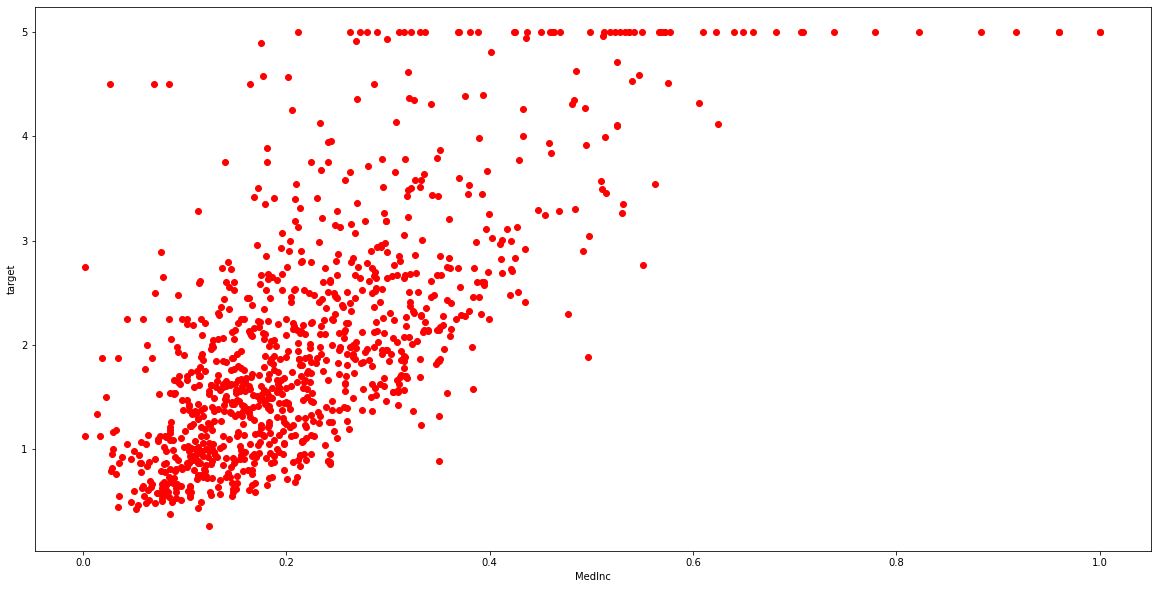

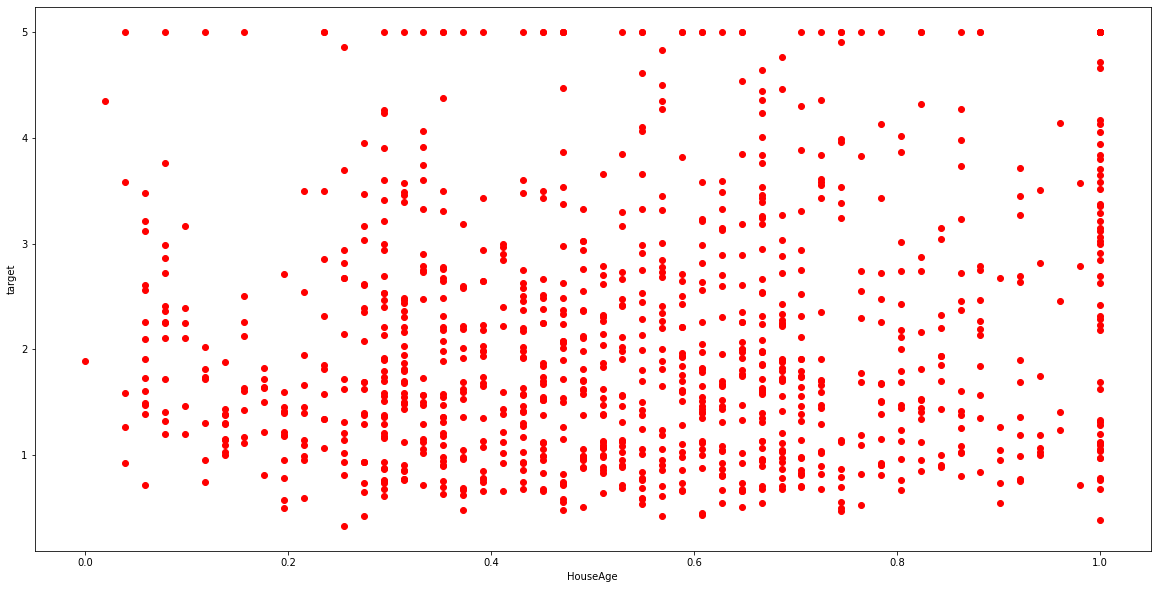

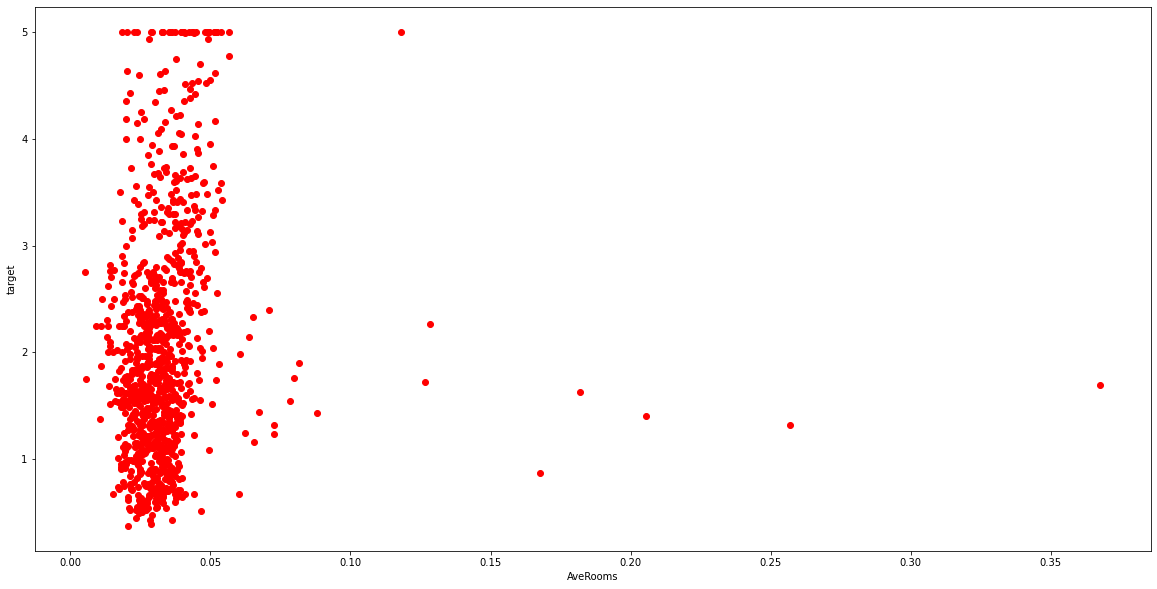

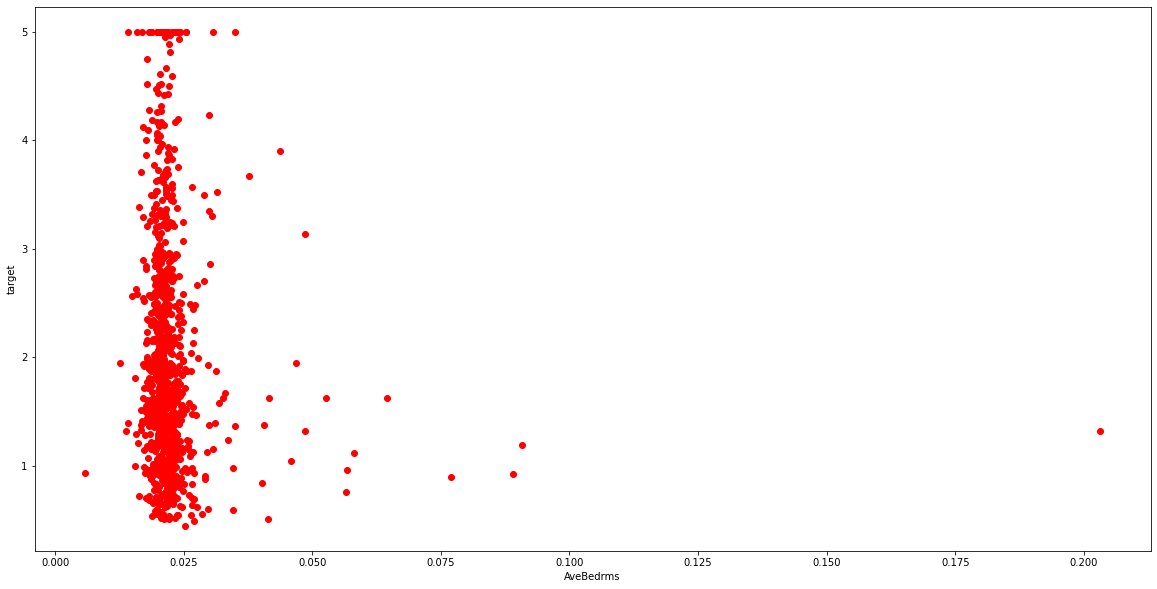

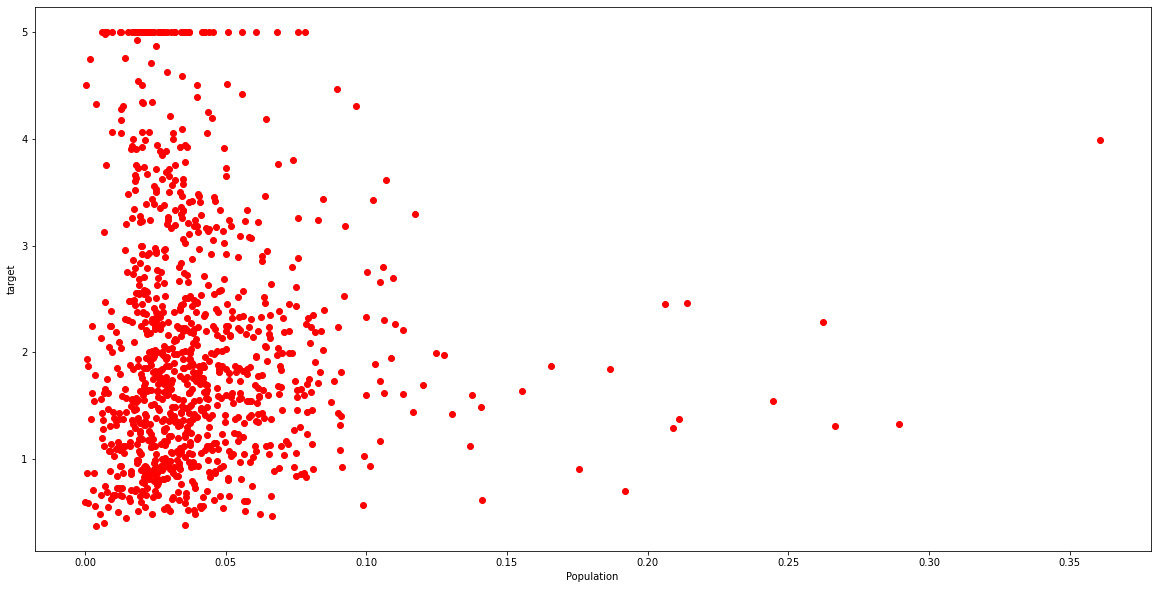

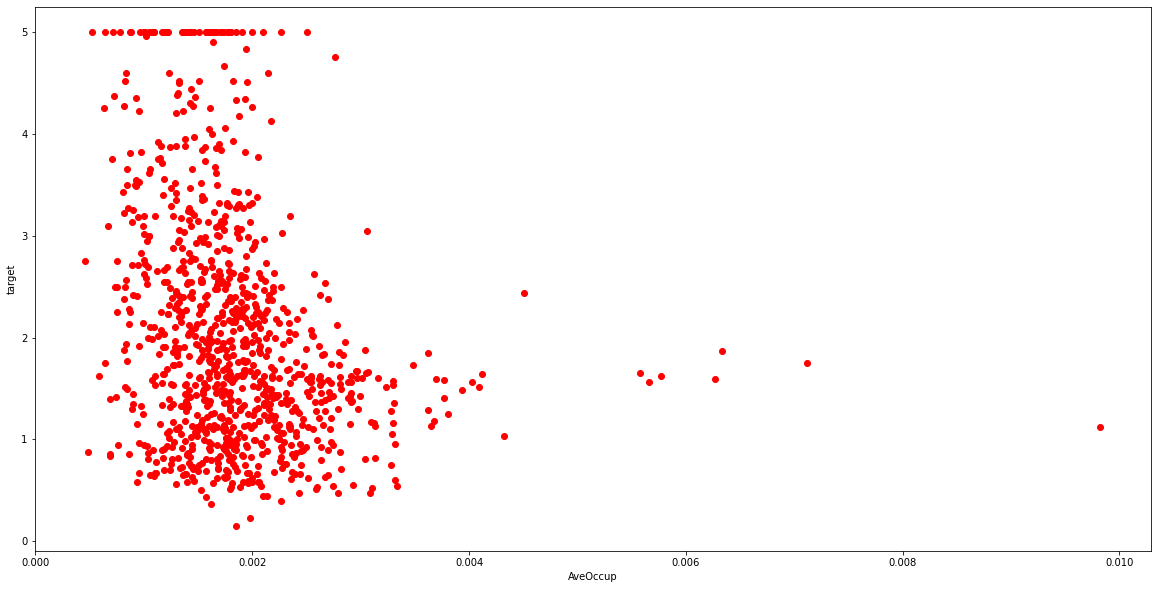

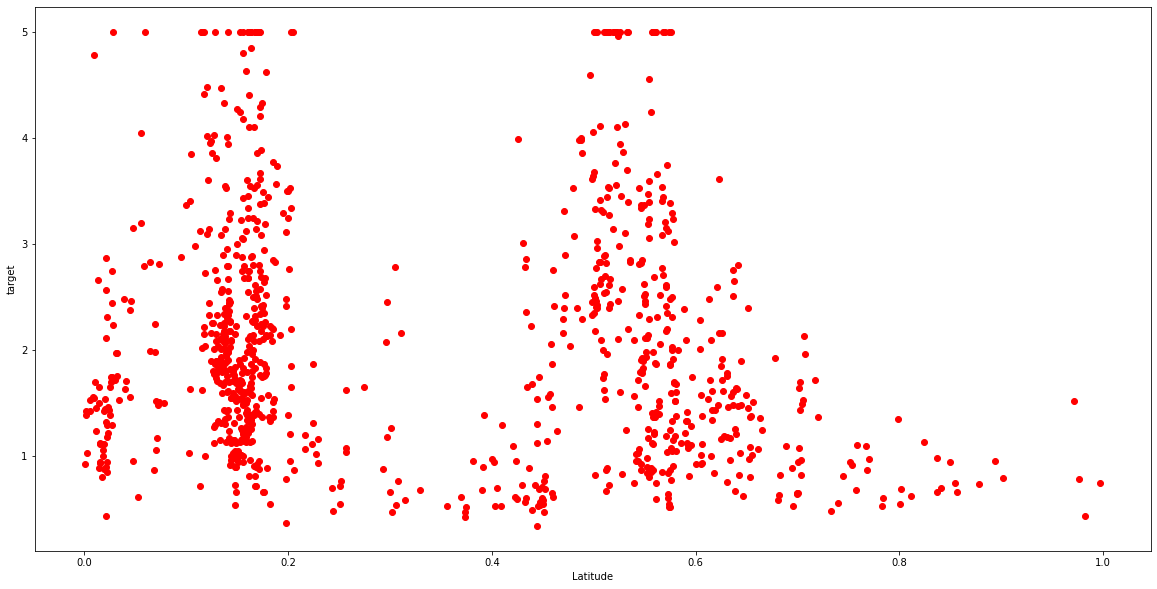

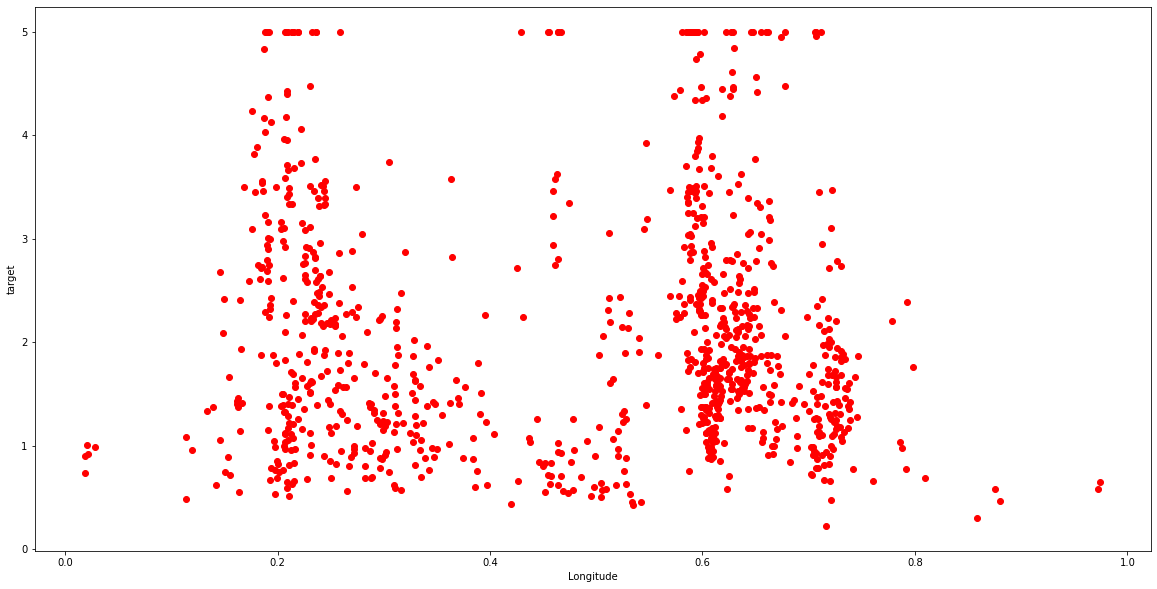

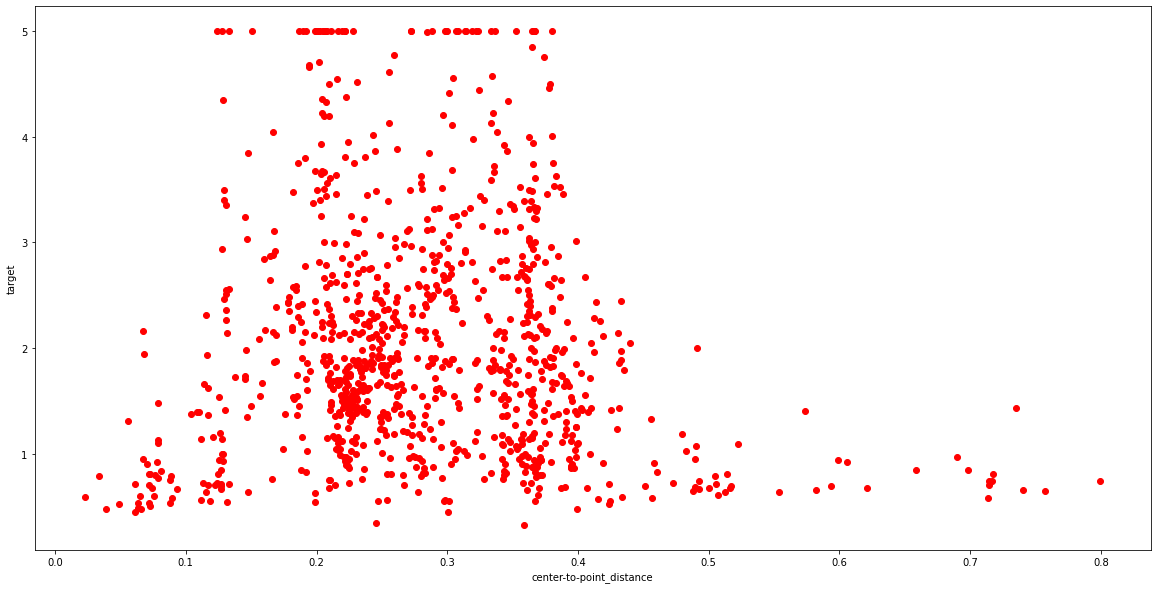

In [ ]:
for predictor in predictors:
  for_visual_df = scaled_df[[predictor, 'target']].sample(n=1000)
  plot_function(
      for_visual_df[predictor].to_list(),
      for_visual_df['target'].to_list(),
      predictor,
      'target'
  )

# Linear regression model

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

xs = scaled_df['MedInc'].to_list()
ys = scaled_df['target'].to_list()

xs, ys = np.array(xs).reshape((-1, 1)), np.array(ys)

model.fit(xs, ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r_sq = model.score(xs, ys)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.473447491807199


In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.6597832191929593
slope: [6.06019172]


In [ ]:
y_pred = model.predict(xs)
print('predicted response:', y_pred, sep='\n')

predicted response:
[3.9302773  3.92033036 3.48400258 ... 1.1613512  1.23123052 1.44914365]


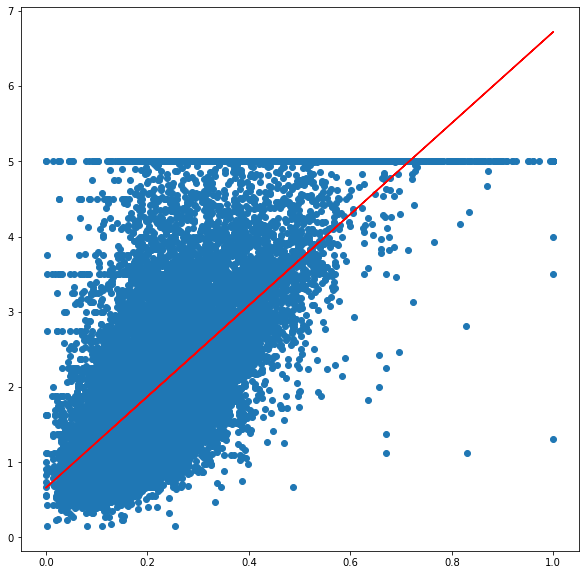

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(xs, ys)
plt.plot(xs, y_pred, color='red')
plt.show()

#plt.plot(np.array(xs).reshape((-1, 1)), y_pred)
#plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    xs, ys, test_size=0.3, random_state=0)

In [ ]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.691, test: 0.725
R^2 train: 0.481, test: 0.456


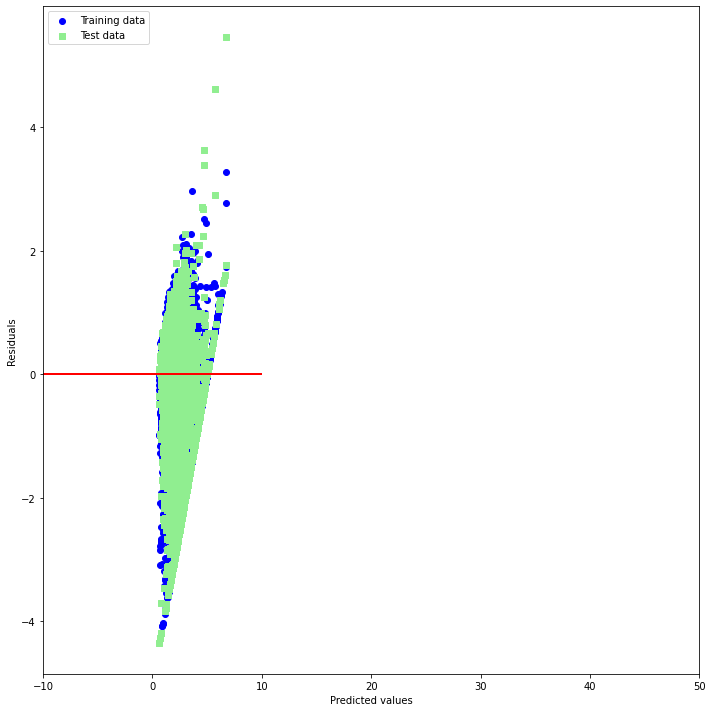

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=10, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('MedInc ~ target', data=scaled_df).fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 MedInc   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:51:55   Log-Likelihood:                 19282.
No. Observations:               20640   AIC:                        -3.856e+04
Df Residuals:                   20638   BIC:                        -3.854e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0709      0.001     52.163      0.000       0.068       0.074
target         0.0781      0.001    136.223      0.000       0.077       0.079
==============================================================================
Omnibus:                     3173.107   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17711.316
Skew:                           0.624   Prob(JB):                         0.00
Kurtosis:                       7.363   Cond. No.                         5.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple regression model

In [ ]:
from sklearn import linear_model, model_selection, feature_selection, preprocessing
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error

X = scaled_df.values.copy()
X_train, X_valid, y_train, y_valid = model_selection.train_test_split( X[:, :-1], X[:, -1], train_size=0.80)

In [ ]:
result = sm.OLS(y_train, add_constant(X_train)).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     2822.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        09:51:55   Log-Likelihood:                -18097.
No. Observations:               16512   AIC:                         3.621e+04
Df Residuals:                   16502   BIC:                         3.629e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6703      0.075     48.816      0.000       3.523       3.818
x1             6.2931      0.068     92.993      0.000       6.160       6.426
x2             0.5031      0.026     19.663      0.000       0.453       0.553
x3           -14.5438      0.913    -15.923      0.000     -16.334     -12.753
x4            20.7827      1.039     20.002      0.000      18.746      22.819
x5            -0.1809      0.192     -0.943      0.346      -0.557       0.195
x6            -4.7851      0.662     -7.233      0.000      -6.082      -3.488
x7            -4.0862      0.078    -52.225      0.000      -4.240      -3.933
x8            -4.4032      0.085    -51.838      0.000      -4.570      -4.237
x9             0.4214      0.061      6.935      0.000       0.302       0.540
==============================================================================
Omnibus:                     3546.660   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11676.818
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.505   Cond. No.                         321.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
print('Intercept is %f' % lm.intercept_)

Intercept is 3.670256


In [ ]:
pd.DataFrame(zip(scaled_df.columns, lm.coef_), columns = ['features', 'Coefficients'])

,features,Coefficients
0,MedInc,6.293075
1,HouseAge,0.503145
2,AveRooms,-14.543762
3,AveBedrms,20.782654
4,Population,-0.180876
5,AveOccup,-4.785092
6,Latitude,-4.086177
7,Longitude,-4.403164
8,center-to-point_distance,0.421353


In [ ]:
model_selection.cross_val_score(lm, X_train, y_train, scoring='r2')

array([0.60848294, 0.61271437, 0.60832103, 0.61052371, 0.56263009])

In [ ]:
ypred = lm.predict(X_valid)
lin_mse = mean_squared_error(y_valid, ypred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7184795042694351

In [ ]:
scaled_df['target'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64

# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_prediction = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, tree_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.1375982844800032e-07

# Comparing Linear Regreesion and Decision Tree results

In [ ]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

lin_scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [ ]:
print('Scores:', tree_rmse_scores)
print('Mean:', tree_rmse_scores.mean())
print('Standard Deviation:', tree_rmse_scores.std())

Scores: [0.7517007  0.72167357 0.68967948 0.70060406 0.70193217 0.7354821
 0.69690887 0.66362252 0.76009217 0.73308719]
Mean: 0.7154782834759497
Standard Deviation: 0.02855736567570524


In [ ]:
print('Scores:', lin_rmse_scores)
print('Mean:', lin_rmse_scores.mean())
print('Standard Deviation:', lin_rmse_scores.std())

Scores: [0.7243606  0.71406806 0.7175668  0.71613645 0.6996711  0.74515785
 0.70669965 0.75035492 0.75019178 0.75583704]
Mean: 0.7280044249024021
Standard Deviation: 0.019428539339092814


# Random Forest Model: raw

In [ ]:
# Try Random Forest, which is an Ensemble Learning model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print('Mean:', forest_rmse_scores.mean())

Mean: 0.49689405609936177


# Random Forest Model: tuned

In [ ]:
# use GridSearch to find best hyperparameter combinations
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3, 10, 30], 'max_features': [2, 4, 6, 8]},  # try 3x4=12 combinations
    {'bootstrap': [False], 'n_estimators':[3, 10], 'max_features': [2, 3, 4]},  # try 2x3=6 combinations
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')  # each model is trained 5 times, so (12+6)*5 = 80 rounds of training in total
grid_search.fit(X_train, y_train)
grid_search.best_params_  # best parameters

{'max_features': 2, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.31879189, 0.04745902, 0.10280601, 0.03649603, 0.03032928,
       0.1051743 , 0.13358272, 0.12006207, 0.10529868])

In [ ]:
sorted(zip(feature_importances, scaled_df.columns), reverse=True)

[(0.31879188955488713, 'MedInc'),
 (0.1335827220404526, 'Latitude'),
 (0.12006206529930341, 'Longitude'),
 (0.10529868327844055, 'center-to-point_distance'),
 (0.10517429735452755, 'AveOccup'),
 (0.10280600704425559, 'AveRooms'),
 (0.04745901827895223, 'HouseAge'),
 (0.036496034278180385, 'AveBedrms'),
 (0.030329282871000677, 'Population')]

In [ ]:
final_model = grid_search.best_estimator_

best_valiation_score = grid_search.best_score_
best_validation_rmse = np.sqrt(-best_valiation_score)
best_validation_rmse

0.48796856929669047

In [ ]:
final_predictions = final_model.predict(X_valid)
final_mse = mean_squared_error(y_valid, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.4674172020049348

# Neural network 1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Model v1.1

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df[big_corr_df.columns.to_list()], scaled_df['target'], test_size=0.1)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu',
                input_shape=(x_train.shape[1],)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 18s - loss: 0.6748 - mae: 0.6130
Epoch 2/100
 - 17s - loss: 0.6233 - mae: 0.5852
Epoch 3/100
 - 17s - loss: 0.6048 - mae: 0.5733
Epoch 4/100
 - 17s - loss: 0.5908 - mae: 0.5644
Epoch 5/100
 - 17s - loss: 0.5830 - mae: 0.5582
Epoch 6/100
 - 18s - loss: 0.5760 - mae: 0.5539
Epoch 7/100
 - 17s - loss: 0.5715 - mae: 0.5519
Epoch 8/100
 - 17s - loss: 0.5667 - mae: 0.5487
Epoch 9/100
 - 17s - loss: 0.5620 - mae: 0.5467
Epoch 10/100
 - 17s - loss: 0.5584 - mae: 0.5444
Epoch 11/100
 - 17s - loss: 0.5549 - mae: 0.5403
Epoch 12/100
 - 17s - loss: 0.5536 - mae: 0.5400
Epoch 13/100
 - 17s - loss: 0.5496 - mae: 0.5391
Epoch 14/100
 - 17s - loss: 0.5481 - mae: 0.5366
Epoch 15/100
 - 17s - loss: 0.5462 - mae: 0.5356
Epoch 16/100
 - 18s - loss: 0.5445 - mae: 0.5343
Epoch 17/100
 - 17s - loss: 0.5439 - mae: 0.5349
Epoch 18/100
 - 17s - loss: 0.5425 - mae: 0.5341
Epoch 19/100
 - 17s - loss: 0.5415 - mae: 0.5319
Epoch 20/100
 - 17s - loss: 0.5401 - mae: 0.5315
Epoch 21/100
 - 17s - loss: 0

In [ ]:
mse, mae = model.evaluate(x_test, y_test, verbose=0)
print(mae)

0.5342623591423035


In [ ]:
pred = model.predict(x_test)

In [ ]:
for i in range(1, len(scaled_df)):
  pr = pred[i][0]
  tv = y_test.values[i]
  print(f"Predicted value is {pr}, test value is {tv}, distance between them is {abs(pr-tv)}")
  if i == 8:
    break

Predicted value is 3.466143846511841, test value is 3.449, distance between them is 0.017143846511840977
Predicted value is 1.8498661518096924, test value is 1.347, distance between them is 0.5028661518096924
Predicted value is 2.1207926273345947, test value is 1.646, distance between them is 0.4747926273345948
Predicted value is 1.4809129238128662, test value is 0.676, distance between them is 0.8049129238128662
Predicted value is 1.5367770195007324, test value is 1.528, distance between them is 0.008777019500732397
Predicted value is 1.2456464767456055, test value is 0.556, distance between them is 0.6896464767456054
Predicted value is 2.2073147296905518, test value is 1.489, distance between them is 0.7183147296905517
Predicted value is 2.0324411392211914, test value is 1.568, distance between them is 0.46444113922119135


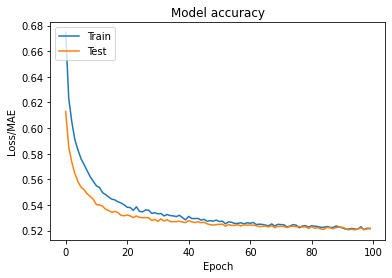

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.title('Model accuracy')
plt.ylabel('Loss/MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model v1.2

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df.drop(labels='target', axis=1), scaled_df['target'], test_size=0.1)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu',
                input_shape=(x_train.shape[1],)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 18s - loss: 0.5921 - mae: 0.5638
Epoch 2/100
 - 18s - loss: 0.4968 - mae: 0.5070
Epoch 3/100
 - 18s - loss: 0.4640 - mae: 0.4849
Epoch 4/100
 - 18s - loss: 0.4419 - mae: 0.4702
Epoch 5/100
 - 18s - loss: 0.4235 - mae: 0.4584
Epoch 6/100
 - 19s - loss: 0.4131 - mae: 0.4519
Epoch 7/100
 - 18s - loss: 0.4039 - mae: 0.4464
Epoch 8/100
 - 18s - loss: 0.3977 - mae: 0.4426
Epoch 9/100
 - 18s - loss: 0.3936 - mae: 0.4366
Epoch 10/100
 - 18s - loss: 0.3916 - mae: 0.4355
Epoch 11/100
 - 18s - loss: 0.3860 - mae: 0.4342
Epoch 12/100
 - 18s - loss: 0.3824 - mae: 0.4313
Epoch 13/100
 - 18s - loss: 0.3783 - mae: 0.4296
Epoch 14/100
 - 18s - loss: 0.3770 - mae: 0.4282
Epoch 15/100
 - 18s - loss: 0.3736 - mae: 0.4260
Epoch 16/100
 - 18s - loss: 0.3706 - mae: 0.4233
Epoch 17/100
 - 18s - loss: 0.3685 - mae: 0.4222
Epoch 18/100
 - 18s - loss: 0.3669 - mae: 0.4213
Epoch 19/100
 - 17s - loss: 0.3659 - mae: 0.4204
Epoch 20/100
 - 18s - loss: 0.3619 - mae: 0.4188
Epoch 21/100
 - 18s - loss: 0

In [ ]:
mse, mae = model.evaluate(x_test, y_test, verbose=0)
print(mae)

0.40266960859298706


In [ ]:
pred = model.predict(x_test)

In [ ]:
for i in range(1, len(scaled_df)):
  pr = pred[i][0]
  tv = y_test.values[i]
  print(f"Predicted value is {pr}, test value is {tv}, distance between them is {abs(pr-tv)}")
  if i == 8:
    break

Predicted value is 1.2415266036987305, test value is 0.934, distance between them is 0.3075266036987304
Predicted value is 1.4322328567504883, test value is 1.544, distance between them is 0.11176714324951176
Predicted value is 2.510471820831299, test value is 2.94, distance between them is 0.4295281791687011
Predicted value is 2.2129859924316406, test value is 1.455, distance between them is 0.7579859924316406
Predicted value is 4.141497611999512, test value is 3.522, distance between them is 0.6194976119995119
Predicted value is 1.3842999935150146, test value is 1.766, distance between them is 0.38170000648498537
Predicted value is 2.24228572845459, test value is 1.306, distance between them is 0.9362857284545898
Predicted value is 1.1598680019378662, test value is 1.431, distance between them is 0.27113199806213384


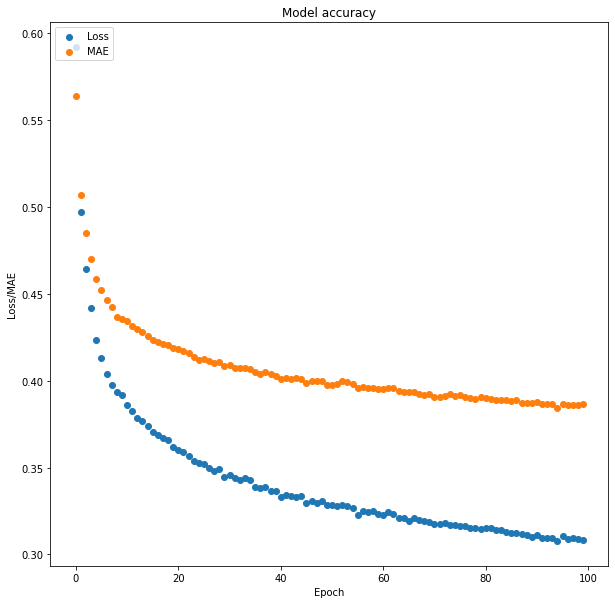

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(history.epoch, history.history['loss'])
plt.scatter(history.epoch, history.history['mae'])
plt.title('Model accuracy')
plt.ylabel('Loss/MAE')
plt.xlabel('Epoch')
plt.legend(['Loss', 'MAE'], loc='upper left')
plt.show()

## Model v1.3

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df.drop(labels='target', axis=1), scaled_df['target'], test_size=0.1)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu',
                input_shape=(x_train.shape[1],)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
 - 9s - loss: 0.6339 - mae: 0.5807
Epoch 2/100
 - 9s - loss: 0.5096 - mae: 0.5141
Epoch 3/100
 - 9s - loss: 0.4709 - mae: 0.4901
Epoch 4/100
 - 9s - loss: 0.4502 - mae: 0.4774
Epoch 5/100
 - 9s - loss: 0.4367 - mae: 0.4681
Epoch 6/100
 - 9s - loss: 0.4238 - mae: 0.4602
Epoch 7/100
 - 9s - loss: 0.4152 - mae: 0.4527
Epoch 8/100
 - 9s - loss: 0.4069 - mae: 0.4470
Epoch 9/100
 - 9s - loss: 0.3998 - mae: 0.4420
Epoch 10/100
 - 9s - loss: 0.3933 - mae: 0.4384
Epoch 11/100
 - 9s - loss: 0.3892 - mae: 0.4359
Epoch 12/100
 - 9s - loss: 0.3839 - mae: 0.4318
Epoch 13/100
 - 9s - loss: 0.3797 - mae: 0.4296
Epoch 14/100
 - 9s - loss: 0.3782 - mae: 0.4291
Epoch 15/100
 - 9s - loss: 0.3729 - mae: 0.4248
Epoch 16/100
 - 9s - loss: 0.3693 - mae: 0.4238
Epoch 17/100
 - 9s - loss: 0.3657 - mae: 0.4212
Epoch 18/100
 - 9s - loss: 0.3659 - mae: 0.4230
Epoch 19/100
 - 9s - loss: 0.3614 - mae: 0.4183
Epoch 20/100
 - 9s - loss: 0.3614 - mae: 0.4187
Epoch 21/100
 - 11s - loss: 0.3605 - mae: 0.4184


In [ ]:
mse, mae = model.evaluate(x_test, y_test, verbose=0)
print(mae)

0.3744991421699524


In [ ]:
pred = model.predict(x_test)

In [ ]:
for i in range(1, len(scaled_df)):
  pr = pred[i][0]
  tv = y_test.values[i]
  print(f"Predicted value is {pr}, test value is {tv}, distance between them is {abs(pr-tv)}")
  if i == 8:
    break

Predicted value is 2.93923282623291, test value is 2.563, distance between them is 0.37623282623291
Predicted value is 0.578088641166687, test value is 0.592, distance between them is 0.013911358833312959
Predicted value is 0.599008321762085, test value is 0.647, distance between them is 0.04799167823791506
Predicted value is 1.2641104459762573, test value is 1.172, distance between them is 0.0921104459762574
Predicted value is 2.7522592544555664, test value is 2.666, distance between them is 0.08625925445556648
Predicted value is 1.7390016317367554, test value is 1.507, distance between them is 0.23200163173675548
Predicted value is 4.343531131744385, test value is 5.00001, distance between them is 0.6564788682556149
Predicted value is 1.9186930656433105, test value is 1.601, distance between them is 0.31769306564331057


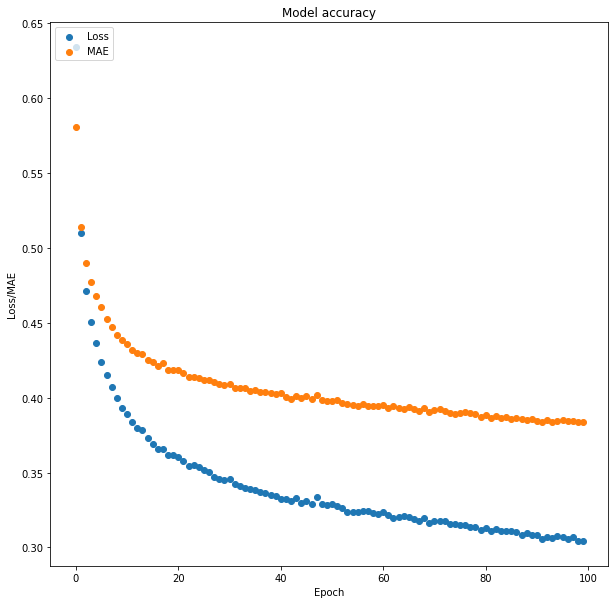

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(history.epoch, history.history['loss'])
plt.scatter(history.epoch, history.history['mae'])
plt.title('Model accuracy')
plt.ylabel('Loss/MAE')
plt.xlabel('Epoch')
plt.legend(['Loss', 'MAE'], loc='upper left')
plt.show()

# Neural network 2

## Preparion

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [ ]:
X = scaled_df.drop(labels='target', axis=1)
Y = scaled_df['target']

## Model v2.1
##### Layer Input: 9
##### Layer Ouput: 1

In [ ]:
# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=2)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator , X=X, y=Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/100
 - 4s - loss: 1.0936
Epoch 2/100
 - 3s - loss: 0.6116
Epoch 3/100
 - 4s - loss: 0.5850
Epoch 4/100
 - 3s - loss: 0.5641
Epoch 5/100
 - 3s - loss: 0.5447
Epoch 6/100
 - 3s - loss: 0.5277
Epoch 7/100
 - 3s - loss: 0.5164
Epoch 8/100
 - 3s - loss: 0.5090
Epoch 9/100
 - 3s - loss: 0.5047
Epoch 10/100
 - 3s - loss: 0.5014
Epoch 11/100
 - 3s - loss: 0.5004
Epoch 12/100
 - 3s - loss: 0.4991
Epoch 13/100
 - 3s - loss: 0.4979
Epoch 14/100
 - 3s - loss: 0.4977
Epoch 15/100
 - 3s - loss: 0.4974
Epoch 16/100
 - 3s - loss: 0.4961
Epoch 17/100
 - 3s - loss: 0.4952
Epoch 18/100
 - 3s - loss: 0.4961
Epoch 19/100
 - 3s - loss: 0.4940
Epoch 20/100
 - 3s - loss: 0.4946
Epoch 21/100
 - 3s - loss: 0.4941
Epoch 22/100
 - 3s - loss: 0.4944
Epoch 23/100
 - 3s - loss: 0.4937
Epoch 24/100
 - 3s - loss: 0.4929
Epoch 25/100
 - 3s - loss: 0.4934
Epoch 26/100
 - 3s - loss: 0.4927
Epoch 27/100
 - 3s - loss: 0.4926
Epoch 28/100
 - 3s - loss: 0.4927
Epoch 29/100
 - 3s - loss: 0.4926
Epoch 30/100
 - 3s - lo

## Model v2.2
#### Layer Input: 9
#### Layer Hidden 1 : 3
#### Layer Output: 1

In [ ]:
# define the model
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='relu'))
	model.add(Dense(3, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
estimator = KerasRegressor(build_fn=larger_model, epochs=100, batch_size=5, verbose=2)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator , X=X, y=Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/100
 - 4s - loss: 1.2325
Epoch 2/100
 - 4s - loss: 0.6421
Epoch 3/100
 - 4s - loss: 0.6125
Epoch 4/100
 - 4s - loss: 0.5904
Epoch 5/100
 - 4s - loss: 0.5710
Epoch 6/100
 - 4s - loss: 0.5523
Epoch 7/100
 - 4s - loss: 0.5399
Epoch 8/100
 - 4s - loss: 0.5295
Epoch 9/100
 - 4s - loss: 0.5200
Epoch 10/100
 - 4s - loss: 0.5124
Epoch 11/100
 - 4s - loss: 0.5075
Epoch 12/100
 - 4s - loss: 0.5025
Epoch 13/100
 - 4s - loss: 0.4981
Epoch 14/100
 - 4s - loss: 0.4954
Epoch 15/100
 - 4s - loss: 0.4925
Epoch 16/100
 - 4s - loss: 0.4900
Epoch 17/100
 - 4s - loss: 0.4892
Epoch 18/100
 - 4s - loss: 0.4867
Epoch 19/100
 - 4s - loss: 0.4845
Epoch 20/100
 - 4s - loss: 0.4823
Epoch 21/100
 - 4s - loss: 0.4800
Epoch 22/100
 - 4s - loss: 0.4788
Epoch 23/100
 - 4s - loss: 0.4766
Epoch 24/100
 - 4s - loss: 0.4754
Epoch 25/100
 - 4s - loss: 0.4743
Epoch 26/100
 - 4s - loss: 0.4723
Epoch 27/100
 - 4s - loss: 0.4696
Epoch 28/100
 - 4s - loss: 0.4693
Epoch 29/100
 - 4s - loss: 0.4681
Epoch 30/100
 - 4s - lo

## Model v2.3
#### Layer Input: 18
#### Layer Output: 1

In [ ]:
# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(18, input_dim=9, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
estimator = KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=2)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator , X=X, y=Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/100
 - 4s - loss: 0.9841
Epoch 2/100
 - 3s - loss: 0.5968
Epoch 3/100
 - 3s - loss: 0.5676
Epoch 4/100
 - 3s - loss: 0.5509
Epoch 5/100
 - 3s - loss: 0.5394
Epoch 6/100
 - 3s - loss: 0.5338
Epoch 7/100
 - 3s - loss: 0.5314
Epoch 8/100
 - 3s - loss: 0.5281
Epoch 9/100
 - 3s - loss: 0.5268
Epoch 10/100
 - 3s - loss: 0.5263
Epoch 11/100
 - 3s - loss: 0.5257
Epoch 12/100
 - 3s - loss: 0.5247
Epoch 13/100
 - 3s - loss: 0.5246
Epoch 14/100
 - 3s - loss: 0.5226
Epoch 15/100
 - 3s - loss: 0.5231
Epoch 16/100
 - 3s - loss: 0.5220
Epoch 17/100
 - 3s - loss: 0.5211
Epoch 18/100
 - 3s - loss: 0.5205
Epoch 19/100
 - 3s - loss: 0.5199
Epoch 20/100
 - 3s - loss: 0.5179
Epoch 21/100
 - 3s - loss: 0.5184
Epoch 22/100
 - 3s - loss: 0.5181
Epoch 23/100
 - 3s - loss: 0.5169
Epoch 24/100
 - 3s - loss: 0.5166
Epoch 25/100
 - 3s - loss: 0.5167
Epoch 26/100
 - 3s - loss: 0.5166
Epoch 27/100
 - 3s - loss: 0.5150
Epoch 28/100
 - 3s - loss: 0.5148
Epoch 29/100
 - 3s - loss: 0.5120
Epoch 30/100
 - 3s - lo